In [1]:
!pip install opencv-python

^C


In [2]:
!pip install tensorflow

  Using cached tensorflow-2.12.0-cp310-cp310-win_amd64.whl (1.9 kB)
     ------------------------------------ 272.8/272.8 MB 734.4 kB/s eta 0:00:00
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
     ---------------------------------------- 4.1/4.1 MB 874.0 kB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached jax-0.4.9.tar.gz (1.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached google_pasta-0.

In [1]:
!pip install keras

  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)


In [2]:
!pip install mediapipe

     ---------------------------------------- 50.2/50.2 MB 1.6 MB/s eta 0:00:00
     -------------------------------------- 199.7/199.7 kB 2.0 MB/s eta 0:00:00
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
     ---------------------------------------- 44.9/44.9 MB 1.6 MB/s eta 0:00:00
     -------------------------------------- 904.0/904.0 kB 3.0 MB/s eta 0:00:00
  Using cached flatbuffers-23.5.8-py2.py3-none-any.whl (26 kB)


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
# define a video capture object
vid = cv2.VideoCapture(0)
   
while(True):

    # Capture the video frame
    # by frame
    ret, frame = vid.read()
    frame = cv2.flip(frame, 1)

    # Draw landmarks
    #draw_styled_landmarks(image, results)

    # Display the resulting frame
    cv2.imshow('frame', frame)

    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

In [10]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [11]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [12]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [13]:
# define a video capture object
vid = cv2.VideoCapture(0)
  
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:    
    while(True):

        # Capture the video frame
        # by frame
        ret, frame = vid.read()
        frame = cv2.flip(frame, 1)

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Display the resulting frame
        cv2.imshow('frame', image)

        # the 'q' button is set as the
        # quitting button you may use any
        # desired button of your choice
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
check = 468*3+33*4+21*3 + 21*3
if(len(extract_keypoints(results))== check):
    print("The calculation of pose,face,lh,rh landmarks has been done correctly in extract_keypoints")

The calculation of pose,face,lh,rh landmarks has been done correctly in extract_keypoints


In [20]:
import os
import numpy as np

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

start_folder=30

In [21]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [ ]:
#collecting data

In [13]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()
                frame = cv2.flip(frame, 1)

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [16]:
import tensorflow as tf

In [17]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [22]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [24]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [25]:
np.array(sequences).shape

(90, 30, 1662)

In [26]:
np.array(labels).shape

(90,)

In [27]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [30]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [31]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [32]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [33]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 11s 146ms/step - loss: 1.1954 - categorical_accuracy: 0.3176
Epoch 2/2000
3/3 [==============================] - 0s 114ms/step - loss: 1.1640 - categorical_accuracy: 0.2353
Epoch 3/2000
3/3 [==============================] - 0s 119ms/step - loss: 1.4649 - categorical_accuracy: 0.3765
Epoch 4/2000
3/3 [==============================] - 0s 112ms/step - loss: 1.0424 - categorical_accuracy: 0.4000
Epoch 5/2000
3/3 [==============================] - 0s 102ms/step - loss: 2.2781 - categorical_accuracy: 0.3294
Epoch 6/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.9968 - categorical_accuracy: 0.4235
Epoch 7/2000
3/3 [==============================] - 0s 94ms/step - loss: 2.5456 - categorical_accuracy: 0.3882
Epoch 8/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.1277 - categorical_accuracy: 0.4118
Epoch 9/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.1003 - categorical_accuracy:

3/3 [==============================] - 0s 111ms/step - loss: 0.5267 - categorical_accuracy: 0.6824
Epoch 74/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.3528 - categorical_accuracy: 0.9412
Epoch 75/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.2609 - categorical_accuracy: 0.9412
Epoch 76/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.1611 - categorical_accuracy: 0.9882
Epoch 77/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.1143 - categorical_accuracy: 1.0000
Epoch 78/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0564 - categorical_accuracy: 0.9765
Epoch 79/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0440 - categorical_accuracy: 0.9882
Epoch 80/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.1260 - categorical_accuracy: 0.9412
Epoch 81/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.0698 - categorical_accuracy: 0.9765

3/3 [==============================] - 0s 116ms/step - loss: 5.7653e-05 - categorical_accuracy: 1.0000
Epoch 144/2000
3/3 [==============================] - 0s 92ms/step - loss: 5.5861e-05 - categorical_accuracy: 1.0000
Epoch 145/2000
3/3 [==============================] - 0s 106ms/step - loss: 5.3987e-05 - categorical_accuracy: 1.0000
Epoch 146/2000
3/3 [==============================] - 0s 106ms/step - loss: 5.2377e-05 - categorical_accuracy: 1.0000
Epoch 147/2000
3/3 [==============================] - 0s 110ms/step - loss: 5.0875e-05 - categorical_accuracy: 1.0000
Epoch 148/2000
3/3 [==============================] - 0s 120ms/step - loss: 4.9501e-05 - categorical_accuracy: 1.0000
Epoch 149/2000
3/3 [==============================] - 0s 109ms/step - loss: 4.8064e-05 - categorical_accuracy: 1.0000
Epoch 150/2000
3/3 [==============================] - 0s 113ms/step - loss: 4.6472e-05 - categorical_accuracy: 1.0000
Epoch 151/2000
3/3 [==============================] - 0s 106ms/step - lo

3/3 [==============================] - 0s 107ms/step - loss: 1.1994e-05 - categorical_accuracy: 1.0000
Epoch 213/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.1791e-05 - categorical_accuracy: 1.0000
Epoch 214/2000
3/3 [==============================] - 0s 116ms/step - loss: 1.1584e-05 - categorical_accuracy: 1.0000
Epoch 215/2000
3/3 [==============================] - 0s 115ms/step - loss: 1.1411e-05 - categorical_accuracy: 1.0000
Epoch 216/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.1237e-05 - categorical_accuracy: 1.0000
Epoch 217/2000
3/3 [==============================] - 0s 112ms/step - loss: 1.1037e-05 - categorical_accuracy: 1.0000
Epoch 218/2000
3/3 [==============================] - 0s 120ms/step - loss: 1.0887e-05 - categorical_accuracy: 1.0000
Epoch 219/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0716e-05 - categorical_accuracy: 1.0000
Epoch 220/2000
3/3 [==============================] - 0s 113ms/step - lo

3/3 [==============================] - 0s 102ms/step - loss: 4.7907e-06 - categorical_accuracy: 1.0000
Epoch 282/2000
3/3 [==============================] - 0s 127ms/step - loss: 4.7402e-06 - categorical_accuracy: 1.0000
Epoch 283/2000
3/3 [==============================] - 0s 96ms/step - loss: 4.6883e-06 - categorical_accuracy: 1.0000
Epoch 284/2000
3/3 [==============================] - 0s 96ms/step - loss: 4.6238e-06 - categorical_accuracy: 1.0000
Epoch 285/2000
3/3 [==============================] - 0s 105ms/step - loss: 4.5719e-06 - categorical_accuracy: 1.0000
Epoch 286/2000
3/3 [==============================] - 0s 108ms/step - loss: 4.5242e-06 - categorical_accuracy: 1.0000
Epoch 287/2000
3/3 [==============================] - 0s 123ms/step - loss: 4.4709e-06 - categorical_accuracy: 1.0000
Epoch 288/2000
3/3 [==============================] - 0s 88ms/step - loss: 4.4289e-06 - categorical_accuracy: 1.0000
Epoch 289/2000
3/3 [==============================] - 0s 125ms/step - loss

3/3 [==============================] - 0s 102ms/step - loss: 2.4360e-06 - categorical_accuracy: 1.0000
Epoch 351/2000
3/3 [==============================] - 0s 112ms/step - loss: 2.4150e-06 - categorical_accuracy: 1.0000
Epoch 352/2000
3/3 [==============================] - 0s 115ms/step - loss: 2.3940e-06 - categorical_accuracy: 1.0000
Epoch 353/2000
3/3 [==============================] - 0s 110ms/step - loss: 2.3715e-06 - categorical_accuracy: 1.0000
Epoch 354/2000
3/3 [==============================] - 0s 93ms/step - loss: 2.3533e-06 - categorical_accuracy: 1.0000
Epoch 355/2000
3/3 [==============================] - 0s 115ms/step - loss: 2.3393e-06 - categorical_accuracy: 1.0000
Epoch 356/2000
3/3 [==============================] - 0s 108ms/step - loss: 2.3112e-06 - categorical_accuracy: 1.0000
Epoch 357/2000
3/3 [==============================] - 0s 93ms/step - loss: 2.2958e-06 - categorical_accuracy: 1.0000
Epoch 358/2000
3/3 [==============================] - 0s 104ms/step - los

3/3 [==============================] - 0s 116ms/step - loss: 1.3856e-06 - categorical_accuracy: 1.0000
Epoch 420/2000
3/3 [==============================] - 0s 123ms/step - loss: 1.3744e-06 - categorical_accuracy: 1.0000
Epoch 421/2000
3/3 [==============================] - 0s 114ms/step - loss: 1.3646e-06 - categorical_accuracy: 1.0000
Epoch 422/2000
3/3 [==============================] - 0s 106ms/step - loss: 1.3548e-06 - categorical_accuracy: 1.0000
Epoch 423/2000
3/3 [==============================] - 0s 110ms/step - loss: 1.3449e-06 - categorical_accuracy: 1.0000
Epoch 424/2000
3/3 [==============================] - 0s 131ms/step - loss: 1.3393e-06 - categorical_accuracy: 1.0000
Epoch 425/2000
3/3 [==============================] - 0s 116ms/step - loss: 1.3253e-06 - categorical_accuracy: 1.0000
Epoch 426/2000
3/3 [==============================] - 0s 115ms/step - loss: 1.3169e-06 - categorical_accuracy: 1.0000
Epoch 427/2000
3/3 [==============================] - 0s 120ms/step - l

3/3 [==============================] - 0s 119ms/step - loss: 8.4287e-07 - categorical_accuracy: 1.0000
Epoch 489/2000
3/3 [==============================] - 0s 153ms/step - loss: 8.3867e-07 - categorical_accuracy: 1.0000
Epoch 490/2000
3/3 [==============================] - 0s 114ms/step - loss: 8.3306e-07 - categorical_accuracy: 1.0000
Epoch 491/2000
3/3 [==============================] - 0s 119ms/step - loss: 8.2745e-07 - categorical_accuracy: 1.0000
Epoch 492/2000
3/3 [==============================] - 0s 96ms/step - loss: 8.2184e-07 - categorical_accuracy: 1.0000
Epoch 493/2000
3/3 [==============================] - 0s 105ms/step - loss: 8.1623e-07 - categorical_accuracy: 1.0000
Epoch 494/2000
3/3 [==============================] - 0s 113ms/step - loss: 8.1202e-07 - categorical_accuracy: 1.0000
Epoch 495/2000
3/3 [==============================] - 0s 117ms/step - loss: 8.0641e-07 - categorical_accuracy: 1.0000
Epoch 496/2000
3/3 [==============================] - 0s 108ms/step - lo

3/3 [==============================] - 0s 105ms/step - loss: 5.3153e-07 - categorical_accuracy: 1.0000
Epoch 558/2000
3/3 [==============================] - 0s 115ms/step - loss: 5.2873e-07 - categorical_accuracy: 1.0000
Epoch 559/2000
3/3 [==============================] - 0s 112ms/step - loss: 5.2592e-07 - categorical_accuracy: 1.0000
Epoch 560/2000
3/3 [==============================] - 0s 125ms/step - loss: 5.2031e-07 - categorical_accuracy: 1.0000
Epoch 561/2000
3/3 [==============================] - 0s 120ms/step - loss: 5.1751e-07 - categorical_accuracy: 1.0000
Epoch 562/2000
3/3 [==============================] - 0s 104ms/step - loss: 5.1330e-07 - categorical_accuracy: 1.0000
Epoch 563/2000
3/3 [==============================] - 0s 120ms/step - loss: 5.1049e-07 - categorical_accuracy: 1.0000
Epoch 564/2000
3/3 [==============================] - 0s 109ms/step - loss: 5.0769e-07 - categorical_accuracy: 1.0000
Epoch 565/2000
3/3 [==============================] - 0s 108ms/step - l

3/3 [==============================] - 0s 107ms/step - loss: 3.4080e-07 - categorical_accuracy: 1.0000
Epoch 627/2000
3/3 [==============================] - 0s 115ms/step - loss: 3.4080e-07 - categorical_accuracy: 1.0000
Epoch 628/2000
3/3 [==============================] - 0s 111ms/step - loss: 3.3799e-07 - categorical_accuracy: 1.0000
Epoch 629/2000
3/3 [==============================] - 0s 116ms/step - loss: 3.3519e-07 - categorical_accuracy: 1.0000
Epoch 630/2000
3/3 [==============================] - 0s 102ms/step - loss: 3.3519e-07 - categorical_accuracy: 1.0000
Epoch 631/2000
3/3 [==============================] - 0s 111ms/step - loss: 3.3098e-07 - categorical_accuracy: 1.0000
Epoch 632/2000
3/3 [==============================] - 0s 109ms/step - loss: 3.2958e-07 - categorical_accuracy: 1.0000
Epoch 633/2000
3/3 [==============================] - 0s 122ms/step - loss: 3.2677e-07 - categorical_accuracy: 1.0000
Epoch 634/2000
3/3 [==============================] - 0s 103ms/step - l

KeyboardInterrupt: 

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

In [35]:
res = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [36]:
print("Actual:",actions[np.argmax(res[4])]," Predicted:",actions[np.argmax(y_test[4])])

Actual: thanks  Predicted: thanks


In [37]:
model.save('action.h5')

In [30]:
del model

In [38]:
model.load_weights('action.h5')

In [39]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [40]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 71ms/step


In [41]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [43]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[4, 0],
        [0, 1]],

       [[2, 0],
        [0, 3]]], dtype=int64)

In [42]:
from scipy import stats

In [43]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

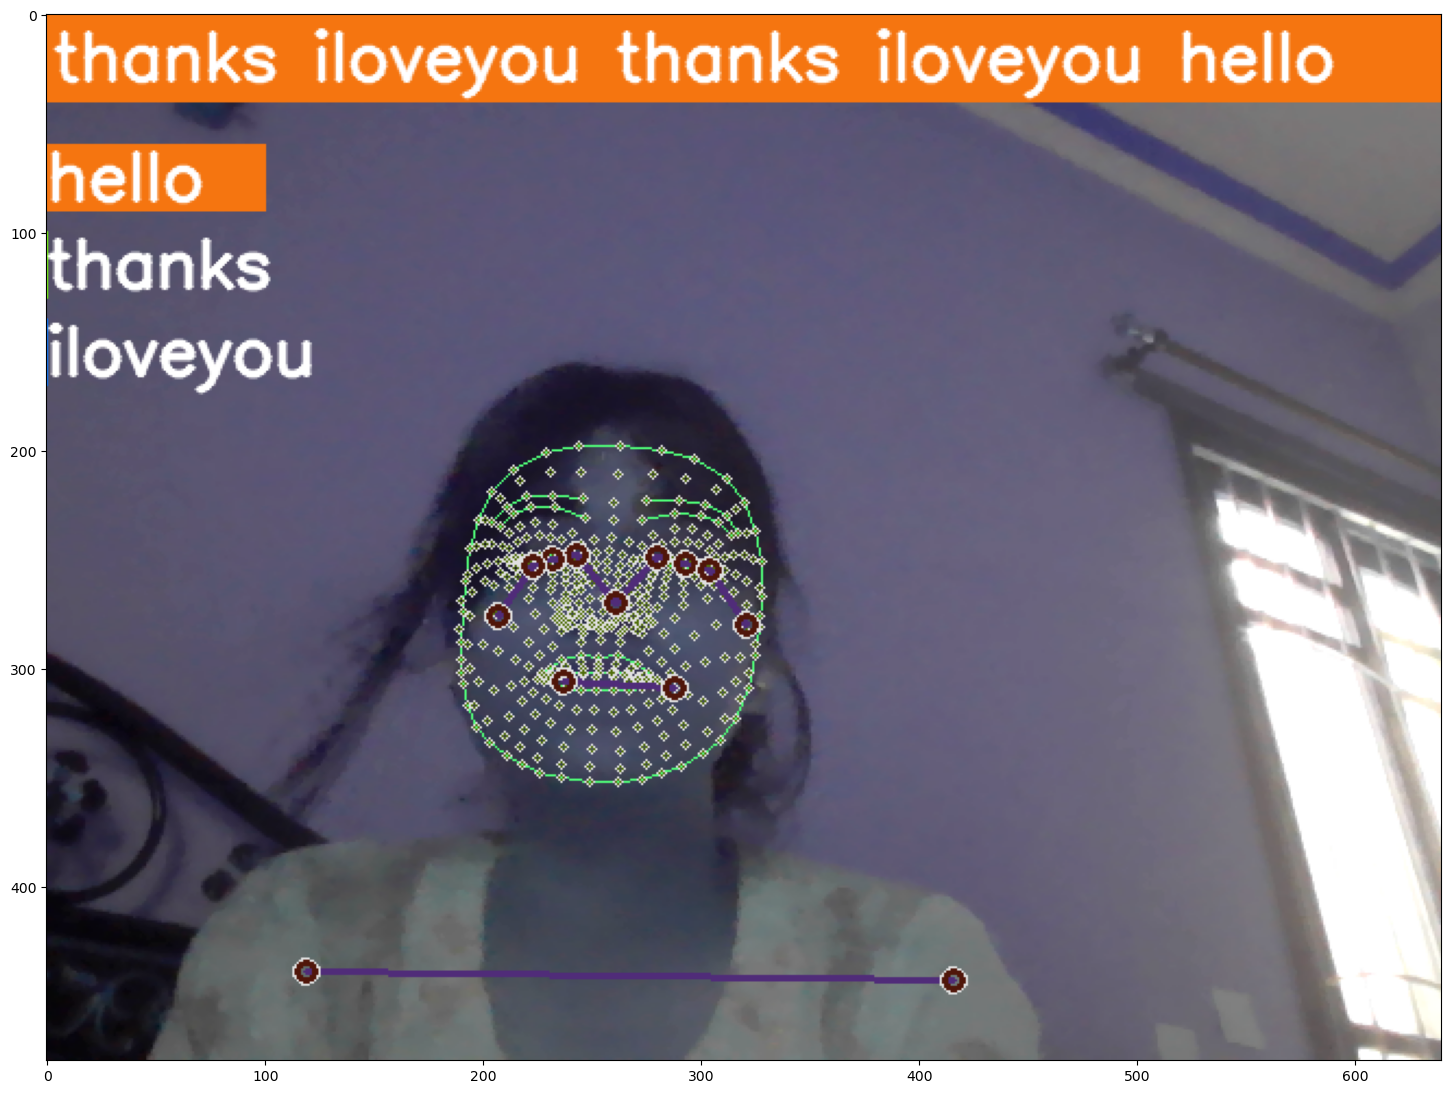

In [48]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [47]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        frame = cv2.flip(frame, 1)

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 37ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 72ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
thanks
<class 'media

1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
ilov

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 51ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 53ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===